# Captstone 3: Portuguese Bank Marketing

### Lisa Patel

#### Summary:

The data is related with direct marketing campaigns of a Portuguese banking institution, based on phone calls (Moro, Cortez, and Rita 2014).Source: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

The goal of the campaigns were to get the clients to subscribe to a term deposit. There are 19 input variables and 1 binary output variable (y) that indicates whether the client subscribed to a term deposit with values ‘yes’,‘no’. The input variables can be divided into four categories:

 - bank client data
 - data related to last contact of current campaign
 - social and economic context attributes
 - other
 
Bank client data contains variables containing information about the client. It includes variables indicating age, job, marital status, education, whether they have credit in default, whether they have a housing loan, whether they have a personal loan.

Data related to the last contact of the current campaign contain variables indicating the mode of communication, month of last communication, day of week when the last contact was made and the last call duration.

Social and economic context attributes contain variables with the quarterly employment variation rate, monthly consumer price index, monthly consumer confidence index, number of employees and the euribor 3 month rate.

Other attributes include number of previous contacts with the client during the current campaign, number of days since the last contact for the previous campaign, number of contacts performed before the current campaign for the client and the outcome of the previous marketing campaign.

#### The goal of the project is to classify with high accuracy whether the campaign will be successful or not given a set of input variables and understand what the profile of the individual that does or does not subscribe to a term deposit. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
train = pd.read_csv('bank-additional-full.csv', sep = ';')

In [5]:
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
print(train.shape)
train.info()

(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   411

## Input variables:

#### Client data: 
1. age: (numeric)
2.  job : type of job (categorical: 'admin.','blue collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'primary', 'secondary', 'tertiary', 'unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

#### Last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day: last contact day of the month (numerical)
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Social and economic context attributes
12. emp.var.rate: employment variation rate - quarterly indicator (numeric)
13. cons.price.idx: consumer price index - monthly indicator (numeric) 
14. cons.conf.idx: consumer confidence index,  measures how optimistic or pessimistic consumers are regarding their expected financial situation - monthly indicator (numeric)
15. euribor3m: euribor 3 month rate, the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months - daily indicator (numeric)
16. nr.employed: number of employees - quarterly indicator (numeric)

#### Other:
17. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
18. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
19. previous: number of contacts performed before this campaign and for this client (numeric)
20. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

## Output variable:
21. y - has the client subscribed a term deposit? (binary: 'yes','no')


In [24]:
train.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
#No missing data
train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### EDA

In [9]:
train.rename(columns = {'y':'Deposit?'}, inplace = True)

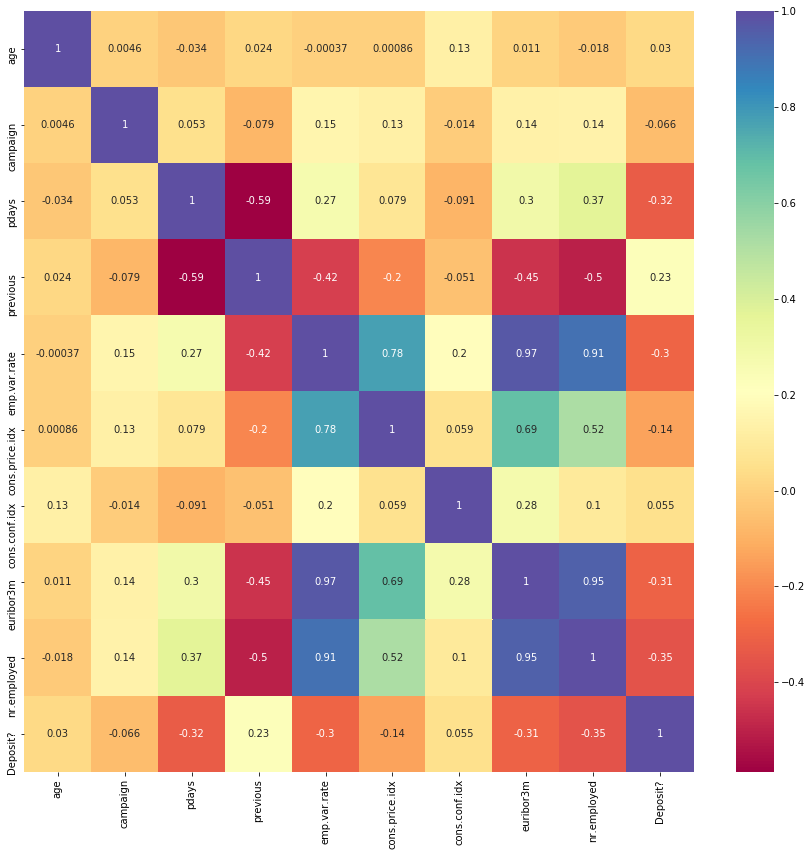

In [32]:
#Term Deposit Subscription (Target). Tranforming Yes = 1 / No = 0
train['Deposit?'] = 1 * (train['Deposit?']== 'yes')
plt.figure(figsize=(15, 14))
sns.heatmap(train.corr(), annot=True, cmap='Spectral')
plt.show()

Heatmap shows most correlation with social & economic context attributes. 

(+): emp.var.rate  & nr.employed, cons.price.idx & eurobor3m/nr.employed,  euribor3m & nr.employed, cons.price.idx & nr.employed. 

(-): emp.var.rate & previous, pdays & previous

Target variable shows positive correlation with euribor.3m and previous and negative  one with nr.employed, emp.var.rate and pdays. 


In [11]:
#Dropping duration given the note in the description
train.drop("duration", inplace=True, axis=1)

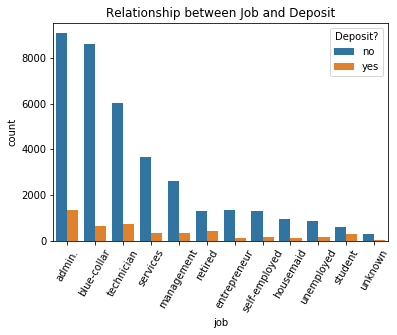

In [12]:
job = sns.countplot(x="job", data = train, hue = "Deposit?", order = train["job"].value_counts().index)
job.tick_params(axis='x', rotation=60)
plt.title("Relationship between Job and Deposit")
plt.show()

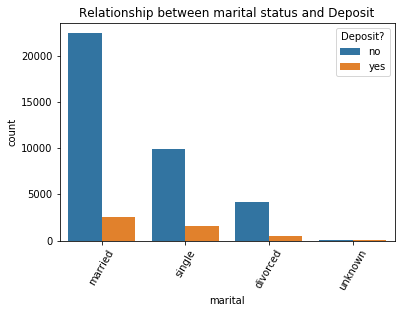

In [13]:
marital = sns.countplot(x="marital", data = train, hue = "Deposit?", order = train["marital"].value_counts().index)
marital.tick_params(axis='x', rotation=60)
plt.title("Relationship between marital status and Deposit")
plt.show()

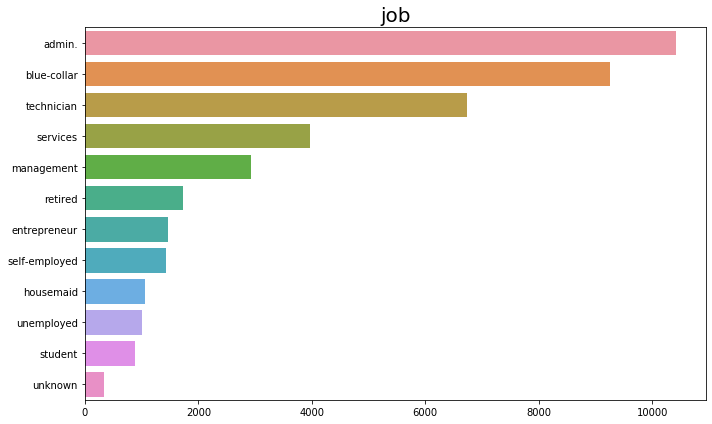

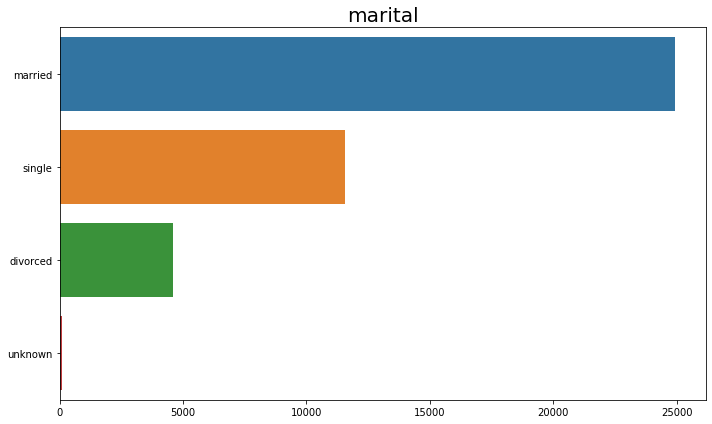

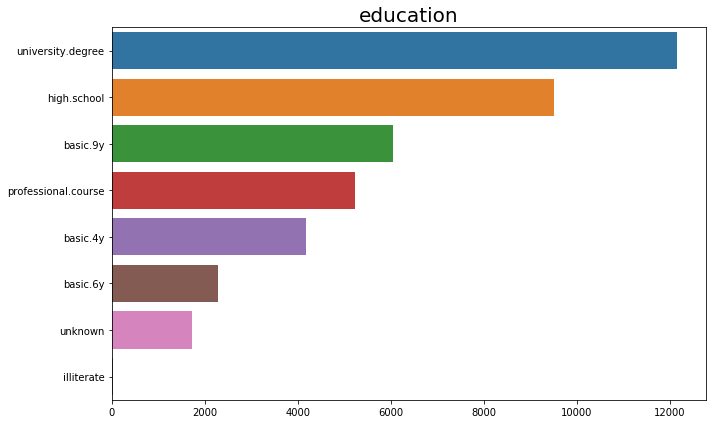

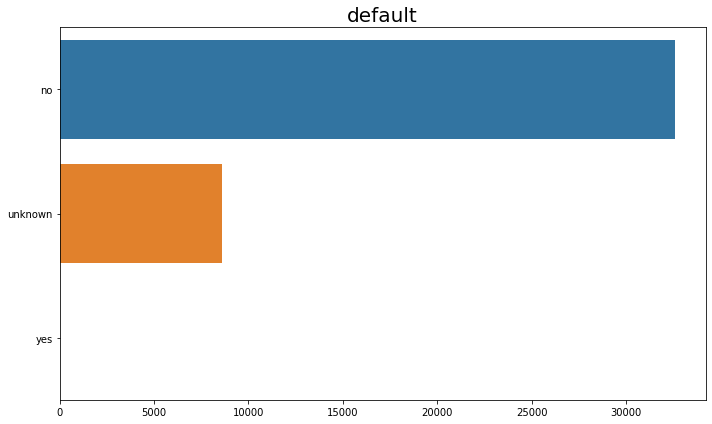

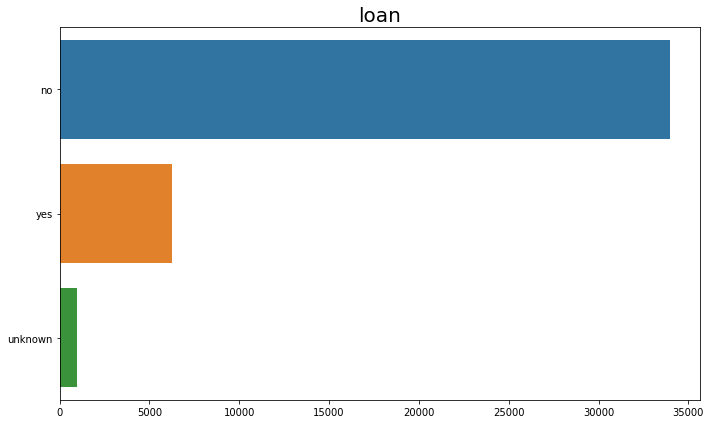

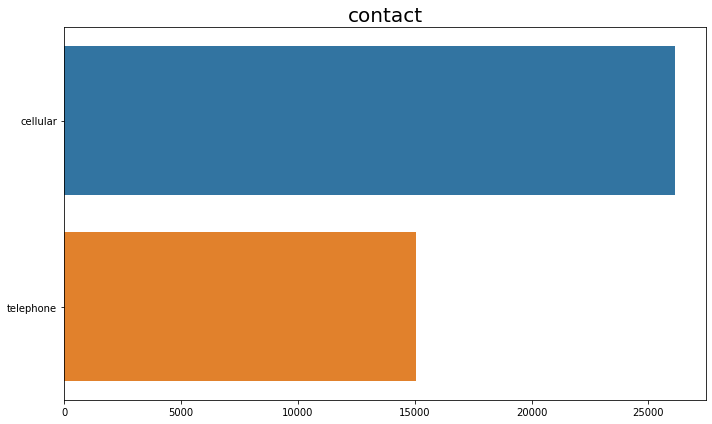

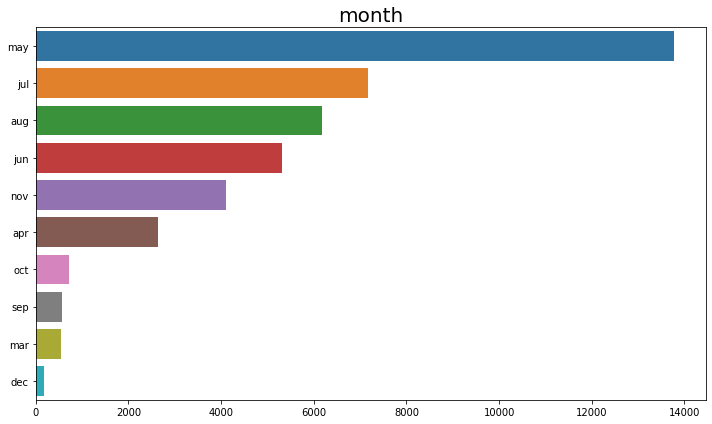

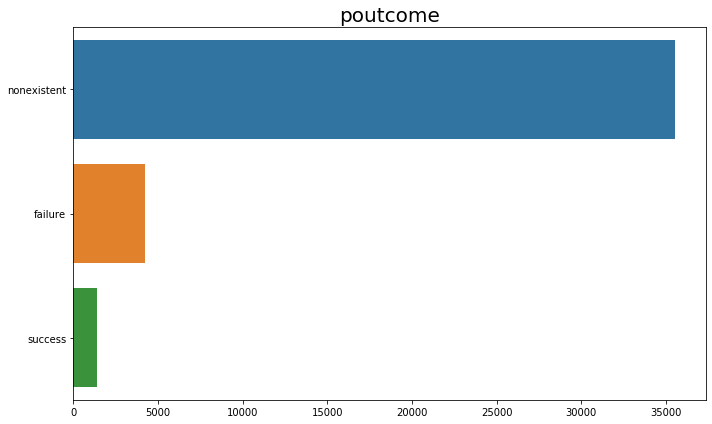

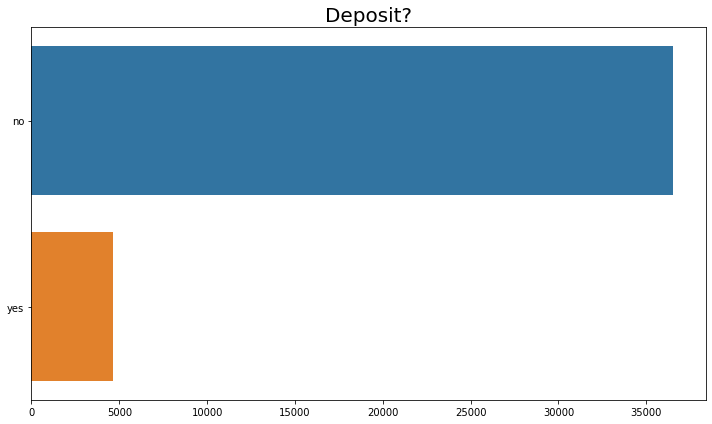

In [15]:
categorical_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'poutcome','Deposit?']
for col in categorical_variables:
    plt.figure(figsize=(10,6))
    sns.barplot(train[col].value_counts().values, train[col].value_counts().index)
    plt.title(col, fontsize = 20)
    plt.tight_layout()
plt.show()

Job


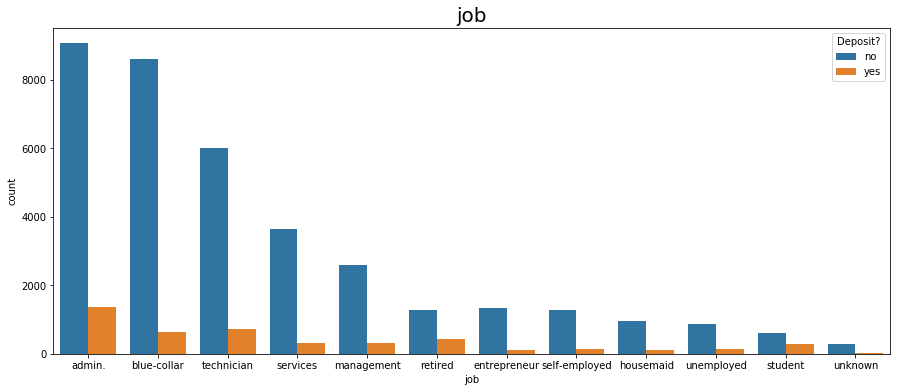

Marital


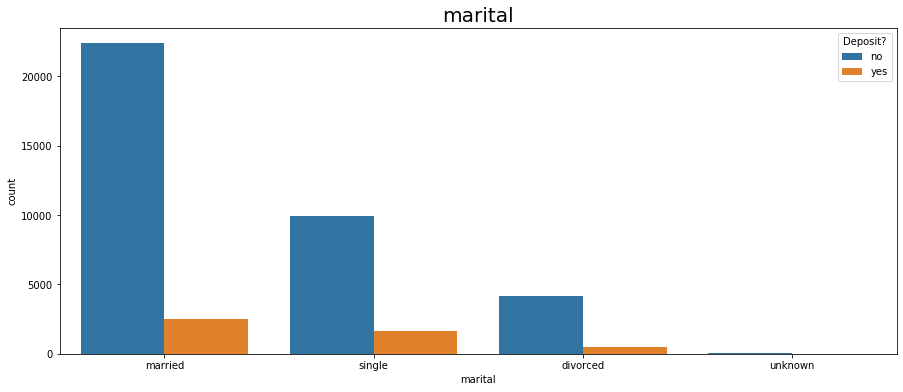

Education


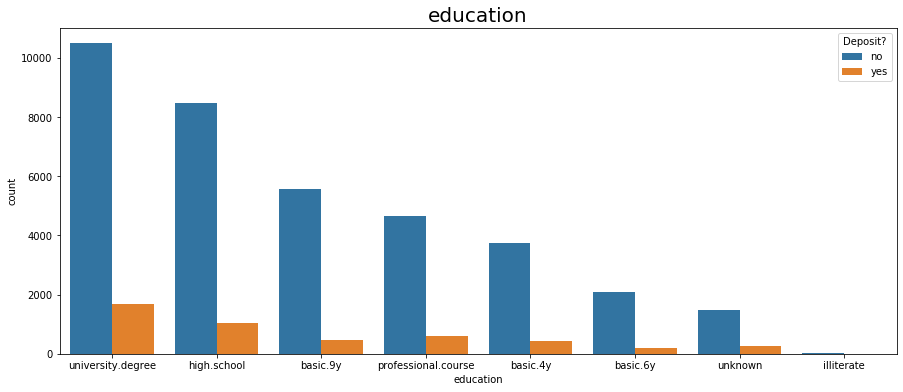

Default


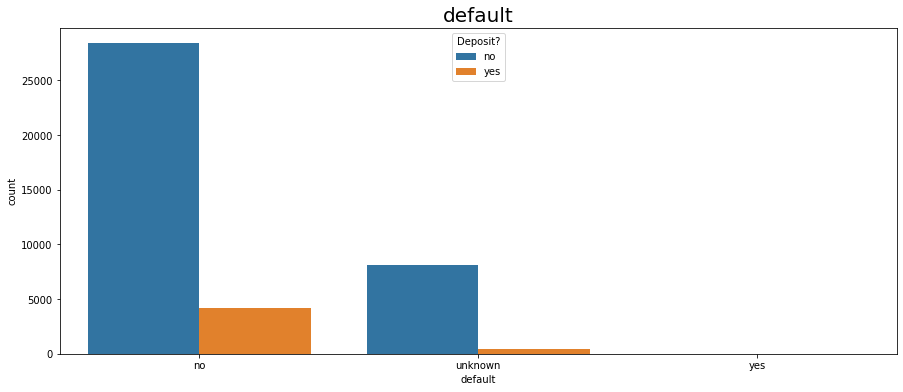

Loan


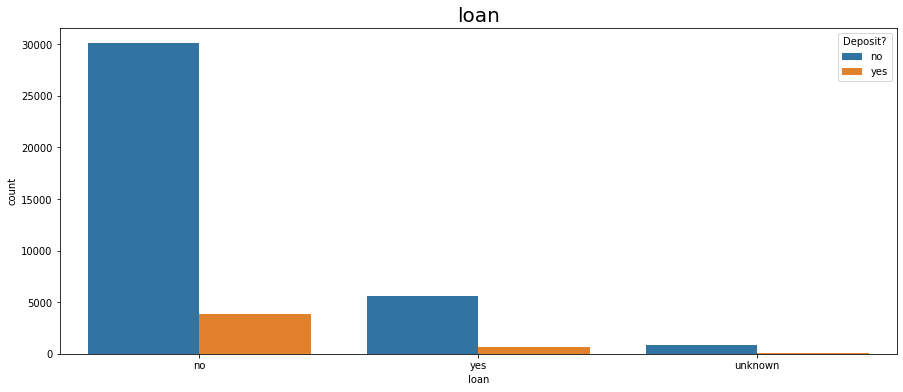

Contact


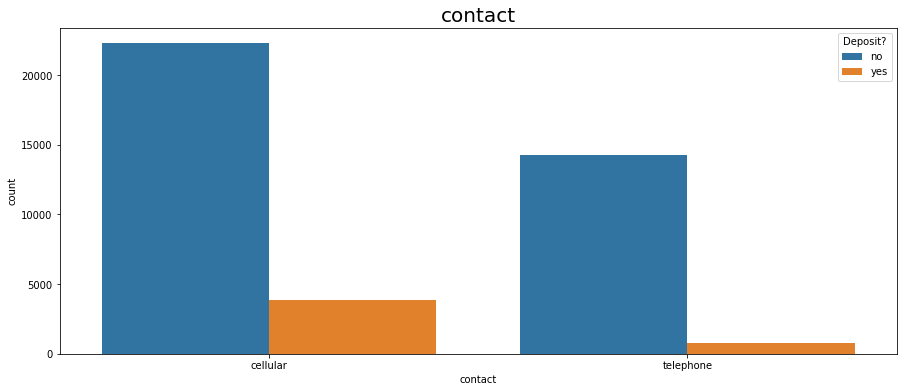

Month


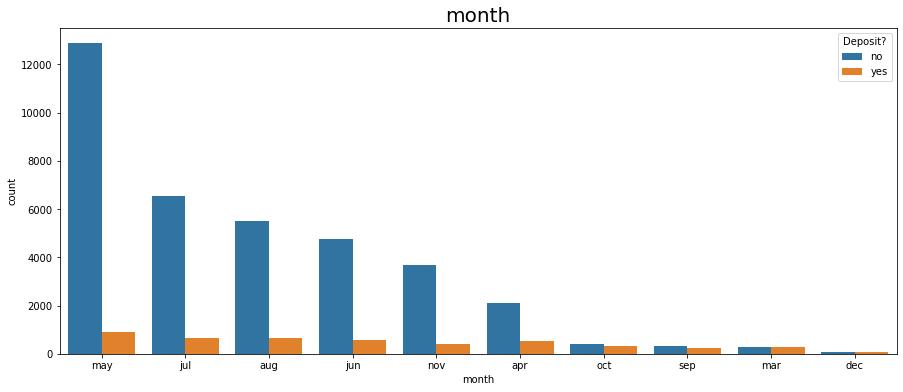

Poutcome


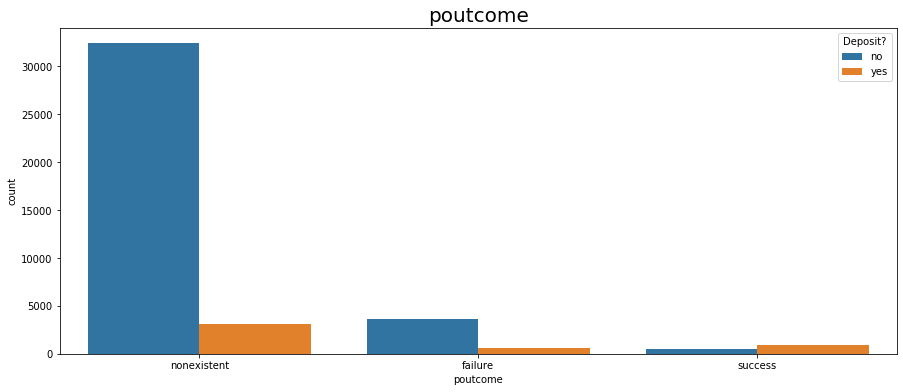

Deposit?


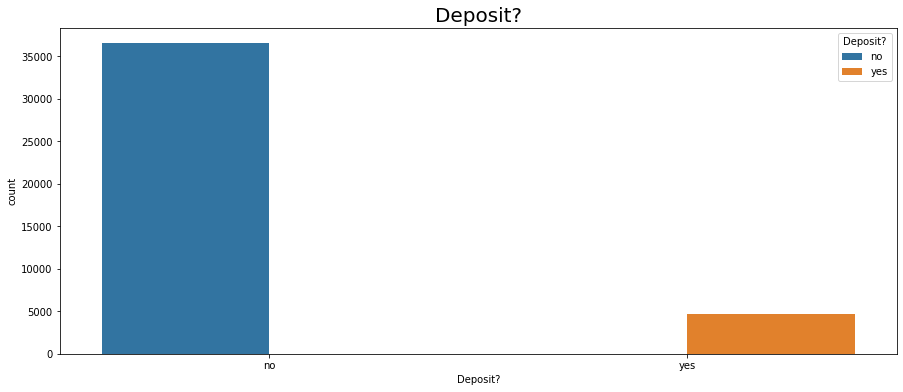

In [16]:
for columns in categorical_variables:
    plt.figure(figsize=(15,6))
    print(columns.title())
    sns.countplot(x = train[columns], data = train, hue='Deposit?', order = train[columns].value_counts().index)
    plt.title(columns, fontsize = 20)
    plt.show()

### Observations:

1.  Blue collar and admin workers were the most prevalent and most likely to subscribe with students, housemaids, unemployed and entrepreneur having least likelihood. 

2. Married and Single individuals had similar numbers of subscriptions

3. Not suprisingly, those with university degrees were more likely to subscribe.

4. Most people who were contacted did not have a loan and thus were more able to subscribe

5. Most contacted via cellular.

6. May was signifanctly the busiest month for deposits and december is least.

7. Drastically unbalanced data set with only ~5k being yes compared to ~35k saying no a subscription. Various techiniques, like oversampling, undersampling, SMOTE, will have to be used to adjust for this.                


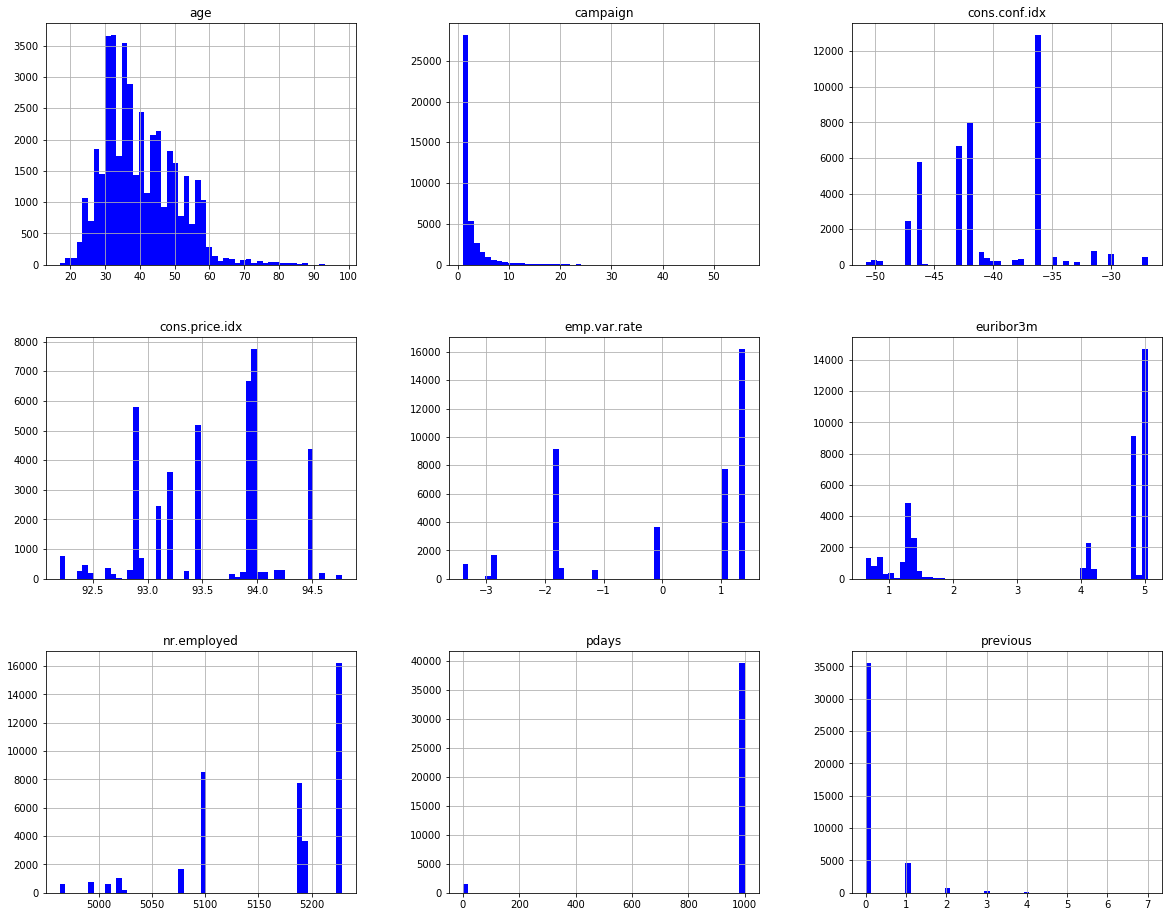

In [17]:
#to check the distribution of columns
train.hist(bins = 50, figsize=(20,16), color = 'blue') 
plt.show()

According to the decription of the pdays, 999 corresponds to the client not being contacted. Given that the majority are 999, it makes sense to drop it and maybe 'previous' as a column.


In [35]:
train.drop("pdays", inplace=True, axis=1)

## Age Distribution

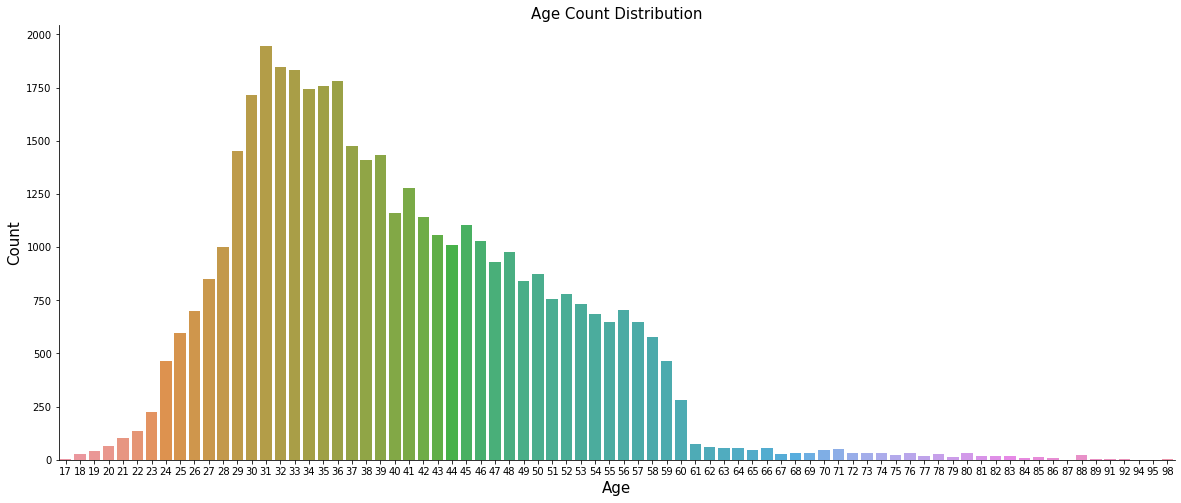

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = train)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

Text(0.5, 1.0, 'Count of Calls made on Days of the Month')

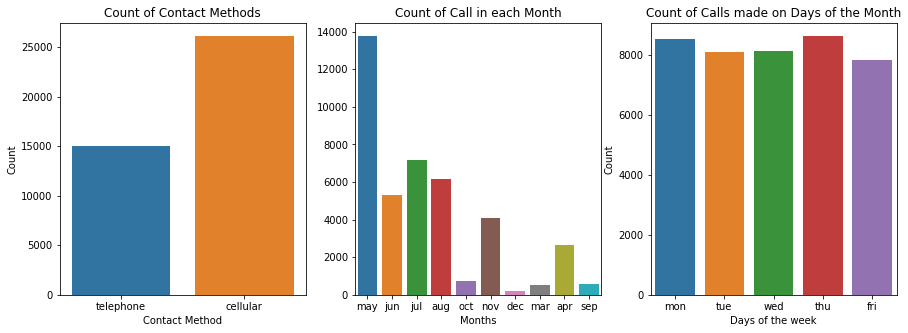

In [34]:
# For contact and Days of the week
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

sns.countplot(x = 'contact', data = train, ax = ax1)
ax1.set_xlabel("Contact Method")
ax1.set_ylabel("Count")
ax1.set_title("Count of Contact Methods")

sns.countplot(train['month'], ax = ax2)
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Count of Call in each Month')
ax2.tick_params(labelsize=10)

sns.countplot(train['day_of_week'], ax = ax3)
ax3.set_xlabel("Days of the week")
ax3.set_ylabel("Count")
ax3.set_title("Count of Calls made on Days of the Month")